# Linear Regression with One Variable

This notebook is an implemention of simple linear regression to predict profits for a food truck. Lets suppose a CEO of a
restaurant franchise is considering different cities for opening a new
outlet. The chain already has trucks in various cities and we have data for
profits and populations from the cities.

We would like to use this data to select which city to expand
to next. The file 'data1_single.txt' contains the dataset for our linear regression prob-
lem. The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [80]:
# Import the necessary packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from mpl_toolkits import mplot3d

%matplotlib inline

In [81]:
# Load the dataset as a numpy array
dataset_array = np.loadtxt('data1_single.txt', delimiter=',')
m,n = dataset_array.shape

In [82]:
# Load the dataset as a dataframe 'df' to do Exploratory Data Analysis
df = pd.read_table('data1_single.txt', delimiter=',', names=('Population', 'Profit'))

## Exploring the data

In [83]:
# Print the first few rows of the dataframe
df.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
Population    97 non-null float64
Profit        97 non-null float64
dtypes: float64(2)
memory usage: 1.6 KB


In [85]:
df.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


## Plotting the data

We can use a scatter plot to visualize the
data, since it has only two properties to plot (profit and population).

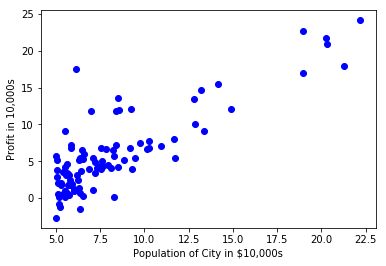

In [86]:
# Create the plot
plt.scatter(df[['Population']], df[['Profit']], marker='o', color='blue')

# Label the plot
plt.xlabel('Population of City in $10,000s')
plt.ylabel('Profit in 10,000s')

# Display the plot
plt.show()

## Implementing Cost Function and Gradient Descent

The cost function evaluates the quality of our model by calculating the error between our model's prediction for a data point, using the model parameters, and the actual data point. The objective of linear regression is to minimize the cost function given by the following equation:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})^2 $$

where the hypothesis $h_\theta(x)$ is given by the linear model:

$$ h_\theta(x) = \theta^Tx = \theta_0 + \theta_1x_1 $$

The parameters of the model are the $\theta_j$ values. These are the values we need to adjust to minimize cost $J(\theta)$. One way to do this is to use the batch gradient descent algorithm. The idea with gradient descent is that for each iteration, we compute the gradient of the error term in order to figure out the appropriate direction to move our parameter vector $\theta$. In other words, we are calculating the changes to make to our parameters in order to reduce the error, thus bringing our solution closer to the optimal solution. In batch gradient descent, each iteration performs the following update:

$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m} (h_\theta(x^{(i)})-y^{(i)})x_j^{(i)}$$
(simultaneously update $\theta_j$ for all j)

With each step of gradient descent, parameters $\theta_j$ come closer to the optimal values that will achieve the lowest cost $J(\theta)$

### Implementation

In the following lines, we add another dimension to our data to accommodate the $\theta_0$ intercept term. We also initialize the initial parameters to 0 and the learning rate $\alpha$ to 0.01. Learning rate is a factor in the update rule for the parameters that helps determine how quickly the algorithm will converge to the optimal solution. Selecting high learning rate may sometimes lead to divergence so trial-and-error is needed to pick a right value for $\alpha$

In [87]:
dataset_array_new = np.ones((m, n+1))
dataset_array_new[:,1:] = dataset_array
dataset_array_new[:5,:]   # Print first 5 rows of the new array

array([[  1.    ,   6.1101,  17.592 ],
       [  1.    ,   5.5277,   9.1302],
       [  1.    ,   8.5186,  13.662 ],
       [  1.    ,   7.0032,  11.854 ],
       [  1.    ,   5.8598,   6.8233]])

In [88]:
# Create X (Feature) and y (Target) variables as numpy matrices
X = dataset_array_new[:, :2]
X = np.asmatrix(X)
y = dataset_array_new[:,2]
y = y.reshape(97,1)
y = np.asmatrix(y)

In [89]:
X.shape, y.shape

((97, 2), (97, 1))

In [90]:
# Initialize theta to zeros
theta = np.zeros((2,1))
theta = np.asmatrix(theta)
iterations = 1500
alpha = 0.01

### Computing the cost $J(\theta)$
As we perform gradient descent to minimize the cost function $J(\theta)$, it is helpful to monitor the convergence by computing the cost. In this section, we will implement a function to calculate $J(\theta)$ so we can check the convergence of our gradient descent implementation.

We can see that the cost calculated for initial theta values of [0,0], is approximately **32.073**

In [91]:
def computeCost(X, y, theta):
    '''computeCost computes cost for linear regression'''
    # J = COMPUTECOST(X, y, theta) computes cost using theta as parameter for linear regression to fit data points in X and y'''

    m = len(y)         # number of training examples
    p = X * theta
    sqrderr = np.square(p - y)
    J = 1/(2*m) * (np.sum(sqrderr))   # Calculate Cost
    return J

In [92]:
J = computeCost(X, y, theta)
print('Cost when theta is [0,0] = {0}'.format(J))

Cost when theta is [0,0] = 32.072733877455676


### Gradient Descent
Next step is to implement gradient descent. The cost $J(\theta)$ is parameterized by the vector $\theta$, so we minimize the value of $J(\theta)$ by changing the values of the vector $\theta$.

A good way to verify that gradient descent is working correctly is to look at the value of $J(\theta)$ and check that it is decreasing with each step. The code for gradient descent calls **computeCost** on every iteration and stores the cost in **J_history**. The value of $J(\theta)$ should never increase, and should converge to a steady value by the end of the algorithm.

After this is finished, we can use our final parameters to plot the linear fit.

In [93]:
def gradientDescent(X, y, theta, alpha, num_iters):
    '''gradientDescent performs gradient descent to learn theta'''
    
    m = len(y);        # number of training examples
    J_history = np.zeros((num_iters, 1));   # Initialize J_history to store cost in every iteration

    for iter in range(num_iters):
        p = X * theta;
        s = np.multiply((p-y),X);
        delta = (1/m) * (s.sum(axis=0));
        theta[0] = theta[0] - (alpha * delta[0,0]);
        theta[1] = theta[1] - (alpha * delta[0,1]);
        
        # Save the cost J in every iteration    
        J_history[iter] = computeCost(X, y, theta);
    
    return theta, J_history

In [94]:
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)
theta

matrix([[-3.63029144],
        [ 1.16636235]])

In [95]:
np.min(J_history)

4.483388256587725

### Plotting the line

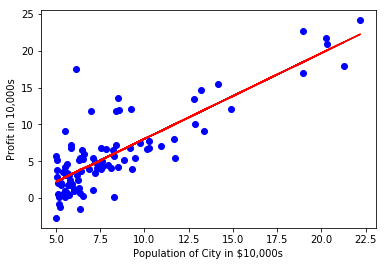

In [96]:
plt.scatter(df[['Population']], df[['Profit']], marker='o', color='blue')
plt.plot(X[:,1], X*theta, color='red')
plt.xlabel('Population of City in $10,000s')
plt.ylabel('Profit in 10,000s')

# Display the plot
plt.show()

## Visualizing $J(\theta)$

To understand the cost function $J(\theta)$ better, we will now plot the cost over
a 2-dimensional grid of $\theta_0$ and $\theta_1$ values. 
In the next step, there is code set up to calculate $J(\theta)$ over a
grid of values using the computeCost function.

In [97]:
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

# initialize J vals to a matrix of 0's
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))
# Fill out J vals
for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t = [[theta0_vals[i]], [theta1_vals[j]]]
        J_vals[i,j] = computeCost(X, y, t)

### Creating Surface and Contour plots

After the above lines are executed, we will have a 2-D array of $J(\theta)$ values.
We will use these values to produce surface and contour
plots of $J(\theta)$. 

The purpose of these graphs is to show how $J(\theta)$ varies with
changes in $\theta_0$ and $\theta_1$. The cost function $J(\theta)$ is bowl-shaped and has a global
mininum. (This is easier to see in the contour plot than in the 3D surface
plot). This minimum is the optimal point for $\theta_0$ and $\theta_1$, and each step of
gradient descent moves closer to this point.

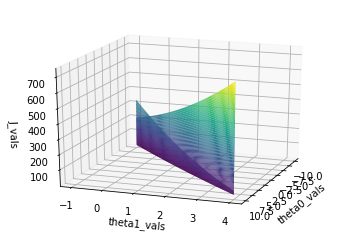

In [98]:
ax1 = plt.axes(projection='3d')
ax1.plot_surface(theta0_vals, theta1_vals, np.transpose(J_vals), rstride=1, cstride=1, cmap='viridis', edgecolor='none')
ax1.set_xlabel('theta0_vals')
ax1.set_ylabel('theta1_vals')
ax1.set_zlabel('J_vals')
ax1.view_init(20, 20)
plt.show()

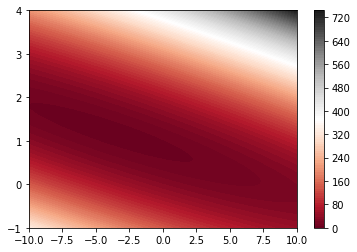

In [99]:
plt.contourf(theta0_vals, theta1_vals, np.transpose(J_vals), 110, cmap='RdGy')
plt.colorbar();

### Predicting profits based on given population

Now, we can use $\theta$ to predict profits (y) based on the population input (X). 

For population of 35,000, we predict a profit of \$4519.77. And for population of 70,000, we predict a profit of \$45342.45. These are shown in the code below:

In [102]:
profit_35k = ([1,3.5]* theta)*10000
profit_70k = ([1,7]*theta)*10000
print('Profit predicted for population of 35,000 is {0}'.format(profit_35k[0,0]))
print('Profit predicted for population of 70,000 is {0}'.format(profit_70k[0,0]))

Profit predicted for population of 35,000 is 4519.7678677017675
Profit predicted for population of 70,000 is 45342.45012944714
